In [1]:
# Importing modules needed for data analysis.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit,fmin
import scipy.io

In [2]:
def sin(x,A,B,C,D):
    return A*np.sin(B*x+C)+D


In [3]:
#Data read-in
mat = list(scipy.io.loadmat('test2.mat').items())
HV = mat[3][1][0]
V_R = mat[4][1][0]



In [4]:
spl = InterpolatedUnivariateSpline(HV,V_R)



In [5]:
x = np.arange(100,5000,0.001)

p, C = curve_fit(sin, x, spl(x),p0=[2.5,0.001,1.6,0])
sigp = np.sqrt(np.diag(C))
A = p[0]
B = p[1]
C = p[2]
D = p[3]
print(p)
print(sigp)


[1.12575911e+00 8.65506191e-04 1.74191435e+00 1.21064143e+00]
[1.99465928e-06 1.63585565e-09 5.43794205e-06 2.42156745e-06]


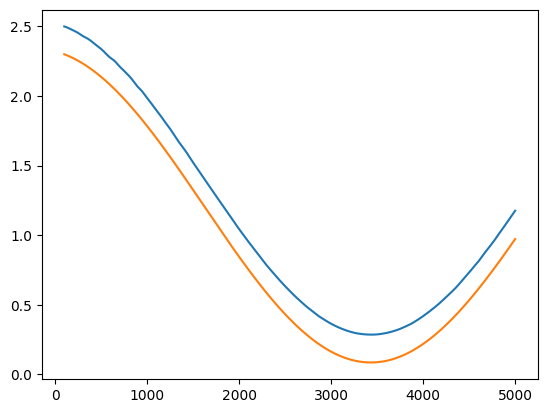

In [6]:
#plt.plot(HV,V_R)

plt.plot(x,spl(x)+0.2)
plt.plot(x,sin(x,A,B,C,D))


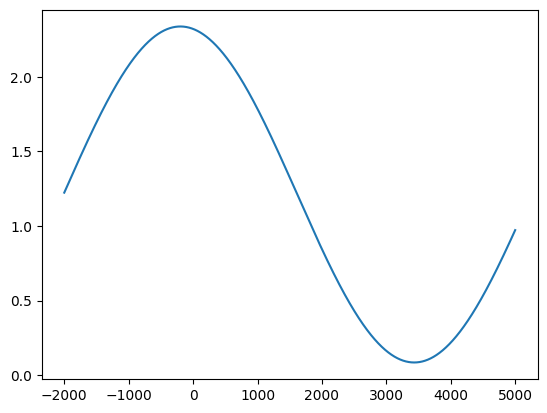

In [7]:
x = np.arange(-2000,5000,0.1)

plt.plot(x,sin(x,A,B,C,D))



In [8]:
print(max(sin(x,A,B,C,D)))
print(min(sin(x,A,B,C,D)))

2.336400540236622
0.08488231446527195


In [9]:
def I_fndr(mat):
    HV = mat[3][1][0]
    V_R = mat[4][1][0]
    spl = InterpolatedUnivariateSpline(HV,V_R)
    x = np.arange(100,5000,0.001)
    p, C = curve_fit(sin, x, spl(x),p0=[2.5,0.001,1.6,0])
    sigp = np.sqrt(np.diag(C))
    A = p[0]
    B = p[1]
    C = p[2]
    D = p[3]
    x = np.arange(-2000,5000,0.1)
    return np.array([max(sin(x,A,B,C,D)), min(sin(x,A,B,C,D))]),p,sigp    
    
    

In [10]:
I,p,sigp=I_fndr(mat)

In [11]:
print(I)

[2.33640054 0.08488231]


In [12]:
def I_fndr(mat):
    spl = InterpolatedUnivariateSpline(mat[3][1][0],mat[4][1][0])
    x = np.arange(100,5000,0.001)
    p, C = curve_fit(sin, x, spl(x),p0=[2.5,0.001,1.6,0])
    x = np.arange(-2000,5000,0.001)
    return np.array([np.max(sin(x,p[0],p[1],p[2],p[3])), np.min(sin(x,p[0],p[1],p[2],p[3]))]),p,np.sqrt(np.diag(C)) 
    
    

In [13]:
I,p,sigp=I_fndr(mat)
print(I)


[2.33640054 0.08488231]


In [14]:
x = np.arange(-2000,5000,0.001)


x[int(np.where(sin(x,p[0],p[1],p[2],p[3])==I[0])[0])]

-197.70900004261853

In [15]:
x[int(np.where(sin(x,p[0],p[1],p[2],p[3])==I[1])[0])]

3432.065999871549

In [16]:
def psi_fndr(mat1,mat2):
    x = np.arange(-2000,5000,0.001)
    I1,p1,sigp1 = I_fndr(mat1)
    I2,p2,sigp2 = I_fndr(mat2)
    a = np.abs(x[int(np.where(sin(x,p1[0],p1[1],p1[2],p1[3])==I1[0])[0])]) + np.abs(x[int(np.where(sin(x,p1[0],p1[1],p1[2],p1[3])==I1[1])[0])])
    b = np.abs(x[int(np.where(sin(x,p2[0],p2[1],p2[2],p2[3])==I2[0])[0])]) + np.abs(x[int(np.where(sin(x,p2[0],p2[1],p2[2],p2[3])==I2[1])[0])])
    return a-b, np.array([p1,sigp1]),np.array([p2,sigp2])

In [17]:
# birefringence = lambda * phase difference / (2pi *d)
# lambda = 632.8nm = 0.6328 micrometer
# d = 5.15 micrometer

def bire_fndr(mat):
    x = np.arange(-2000,5000,1)
    lam = 0.6328 
    d = 5.15
    
    I,p,sigp = I_fndr(mat)
    phi = ((sin(x,p[0],p[1],p[2],p[3]) - I[1])/I[0])*(np.pi/2)
    n = (lam*phi)/(2*np.pi*d)
    
    return n, p, sigp



print(bire_fndr(mat)[0])





[0.01496258 0.01497539 0.0149882  ... 0.01162409 0.0116366  0.01164912]


In [18]:

mat = list(scipy.io.loadmat('31test2-100.mat').items())

In [19]:
#np.set_printoptions(threshold=np.inf)
print(bire_fndr(mat)[0])

[0.01774003 0.0177278  0.01771557 ... 0.02031077 0.02029931 0.02028783]
